# Clustering - DBSCAN <br>
Reference : <br>
https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

%matplotlib inline

In [2]:
# Import dataset
df = pd.read_csv('glass.csv')
print(df.shape)
df.head()

(214, 11)


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# Remove unnecessary columns
X = df.iloc[:, 2:10]
X.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [4]:
# Standardization
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalization
X_normalized = normalize(X_scaled) 
  
# Converting to pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [5]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

         P1        P2
0 -0.183655 -0.105242
1 -0.346508 -0.441834
2 -0.444445 -0.451816
3 -0.696974 -0.258651
4 -0.665044 -0.263463


### DBSCAN (Density-based spatial clustering of applications with noise)

In [6]:
# Need to determine epsilon
db_default = DBSCAN(eps = 0.18, min_samples = 3).fit(X_principal) 
labels = db_default.labels_

In [7]:
print('labels = ', labels)

# Check of labels
print('Number of labels data = ', len(labels))
print('Number of df data =     ', len(X))

labels =  [ 0  0  0  0  0  1  0  0  0  1  1  0  1  1  0  0  0  0  0  1  1  0  0  0
  0  0  0  0  0  0  1  0  1  1  0  0  0  0  0  0  0  0  0  0  1  0  1  0
  0  0  0  1  0  0  1  1  1  0  0  1  0  0  0  0  0  0  1  1  1  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  1  1  0  1  0  0  0
  1  1  0  0  1  0  1  0  0  2 -1 -1 -1  0  0  0 -1  1  0  0  1  0  1  0
  0  1  0  0  0  1  0  2  2 -1  0 -1  0  0  0  1  1  0  0  0  0  1  1  0
  1  1  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0
  0  0  0  0  0  0 -1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
Number of labels data =  214
Number of df data =      214


In [8]:
# Add culumn 'CLS_label' as clustering label
X['CLS_label'] = labels
print(X.shape)
X.head()

(214, 9)


,Na,Mg,Al,Si,K,Ca,Ba,Fe,CLS_label
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [9]:
# Remove noise shown as the label = -1
rows_to_drop = X.index[X['CLS_label'] == -1]
print(rows_to_drop)
X.drop(index = rows_to_drop, inplace=True)
print(X.shape)
X.head()

Int64Index([106, 107, 108, 112, 129, 131, 162, 174], dtype='int64')
(206, 9)


,Na,Mg,Al,Si,K,Ca,Ba,Fe,CLS_label
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [10]:
X.reset_index(inplace=True, drop=True)

In [11]:
# Check if the noise (label = -1) was removed
num_uniq = np.unique(X['CLS_label'])
print(num_uniq)

[0 1 2]


### Scatter plot of clusters

In [12]:
# Make list of colors to draw scatter plot in different colors by cluster 
color_codes = {0:'red',
               1:'green',
               2:'blue',
               3:'yellow',
               4:'magenta',
               5:'cyan',
               6:'black',
               7:'brown',
               8:'orange',
               9:'pink'}

colors = list()
for i in range(len(X)) :
    colors.append(color_codes[X['CLS_label'][i]])

In [13]:
# save files and print data size by label
for i in range(int(len(num_uniq))) :
  label_num = i
  df_new = X[X['CLS_label'] == label_num]
  print('data size of CLS label ', label_num, color_codes.get(i), ' = ', len(df_new), sep = '\t')
  df_new.to_csv('DBSCAN_cluster_' + str(label_num) + '.csv', index=False)

data size of CLS label 	0	red	 = 	158
data size of CLS label 	1	green	 = 	44
data size of CLS label 	2	blue	 = 	4


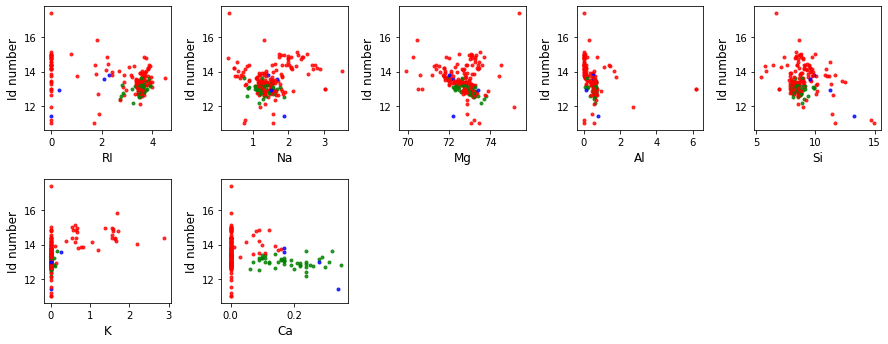

In [14]:
# Draw scatter plots by clusters
horz = 5                     # horizontal number of graph
vert = 5                     # vertical number of graph
graph_num = horz * vert      # maximum number of graphs

axes = list()
fig = plt.figure(figsize=(15, 15))

for i in range(1, len(X.columns) - 1):
    axes.append(fig.add_subplot(vert, horz, i))
    for j in range(len(X)) :
        x = X.iloc[j, i]
        y = X.iloc[j, 0]
        axes[i-1].scatter(x, y, marker='.', c = colors[j], alpha = 0.8)
    axes[i-1].set_xlabel(df.columns[i], size = 12)
    axes[i-1].set_ylabel(df.columns[0], size = 12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()